## Dessine la thé de bulles (Bubble Tea) et le Sapin

#### Objectif dessine des images qui sont : 
<div style="display:flex;justify-content: space-between">
<div style="text-align: center; margin: 10px 20px; padding: 10px">
<p>Dessine la thé à bulles qui sont pareil à l'image suivant</p>
<img src="https://raw.githubusercontent.com/linhdangvu/bubbletea-sapin/main/bubbletea.jpg" alt="Bubble Tea" style="width:100px; height: 150px">
</div>
<div style="text-align: center; margin: 10px 20px;  padding: 10px">
<p>Dessine le Sapin qui sont pareil à l'image suivant</p>
<img src="https://raw.githubusercontent.com/linhdangvu/bubbletea-sapin/main/bubbletea.jpg" alt="Bubble Tea" style="width:100px; height: 150px">
</div>
</div>

#### Des conditions à utiliser:
- Utilise des splines dans le cours
- Utilise la polynome de degré n dans le cours
- Utilise les courbes de cercles/eclispes dans le cours

In [35]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
from numpy.linalg import solve # pour travailler des matrix

Fonction général pour dessiner
- Pour dessiner des lignes qui passe par n points: $$f(x) = a_0x^0 + a_1x^1 + a_2x^2 + ... a_nx^n$$
- Pour dessiner des lignes: $$f(x) = a_0 + a_1x$$
- Pour dessiner des parabols: $$f(x) = a_0 + a_1x + a_2x^2$$
- Pour dessiner des cercles: $$ f(x)= \begin{cases}
                                [0,\pi] \to R^2\\
                                x \to (R*cos(x), R*sin(x))
                                \end{cases} $$
- Pour dessiner des eclispes: $$ f(x)= \begin{cases}
                                [0,\pi] \to R_1,R_2\\
                                x \to (R_1*cos(x), R_2*sin(x))
                                \end{cases} $$ 

In [2]:
# Définir quelques couleurs pour colorer
LIGHT_BROWN = "#f4cfb2"
LIGHT_BLUE = "#e2efff"
BROWN = "#c76b3a"
MOYEN_BROWN = "#d39063"
BLACK = "#1d232b"
PINK = "#faa0ba"
WHITE = "#ffffff"
ORANGE = "#ffc198"

In [3]:
# Cette fonction converte la liste points -> la liste de X, la liste de Y
def toXY(points):
    return [t[0] for t in points],[t[1] for t in points]

#### Explication 
La fonction `drawMultiplePoint(points,showPoint, showBorder, color)`represente le graphe de n points
$$f(x) = a_0x^0 + a_1x^1 + a_2x^2 + ... a_nx^n$$
- Equation: on pose qu'il a n points: $p_0(x_0,y_0)$, $p_1(x_1,y_1)$,...,$p_1(x_n,y_n) \quad \forall \; n \in [0,...,n]$ 
$$ P(x)= \begin{cases}
f(x_0)=y_0\\
f(x_1)=y_1\\
...\\
f(x_n)=y_n
\end{cases} \Rightarrow 
\begin{cases}
a_0 + a_1x_0+a_2x^2_0+...+a_nx^n_0=y_0\\
a_0 + a_1x_1+a_2x^2_1+...+a_nx^n_1=y_1\\
...\\
a_0 + a_1x_n+a_2x^2_n+...+a_nx^n_n=y_n
\end{cases} $$ 
- Correspondant à ce matrix
$$ 
\begin{pmatrix}
1 & x_0 & x^2_0 & ... & x_0^n\\
1 & x_1 & x^2_1 & ... & x_1^n\\
... & ... & ... & ... & ...\\
1 & x_n & x^2_n & ... & x_n^n
\end{pmatrix}
\begin{pmatrix}
a_0 \\
a_1 \\
...\\
a_n
\end{pmatrix}=
\begin{pmatrix}
y_0 \\
y_1 \\
... \\
y_n
\end{pmatrix}
$$

#### Explication du code
- `points` represente des points pour dessiner
- `showPoint` affiche des points si vrai
- `showBorder` affiche des frontière si vrai
- `color` represente la couleur pour colorer

In [4]:
def drawMultiplePoint(points,showPoint, showBorder, color=LIGHT_BROWN):
    # Créer des points pour dessinner
    X,Y = toXY(points)
    N = len(X)
    if showPoint: plt.plot(X,Y, "*r")
        
    def F(x, S, N): return sum(S[t]*(x**t) for t in range(N))
    def createListX(X, N): return [1*[X[d]**t for t in range(N)] for d in range(N)]
    def createListY(Y, N): return [Y[t] for t in range(N)]

    # Créer des listes pour calculer matrix
    A = np.array(createListX(X,N))
    b = np.array(createListY(Y,N))
    S = solve(A,b)
   
    # Position de X pour dessiner avec nombre de points
    Vx = np.linspace(min(X),max(X), 100)
   
    # Position de Y pour dessiner par la définition F
    Vy = [F(t,S,N) for t in Vx]
    if showBorder: plt.plot(Vx,Vy,BLACK,linewidth=1)
    plt.fill(Vx, Vy, color)

#### Explication 
La fonction `drawCircle(pos,showBorder,start,end,R1,R2,color)` represente
$$ f(x)= \begin{cases}
[0,\pi] \to R_1,R_2\\
x \to (R_1*cos(x)+pos, R_2*sin(x)+pos)
\end{cases} $$ 

- Si on veut dessiner un cercle -> $R_1=R_2$
- Si on veut dessiner un eclipse -> $R_1 \neq R_2$
- Si on veut augmenter la taille de cercle/eclipse -> on changer $R_1$ et $R_2$ 
#### Explication du code
- `pos` represente la cercle central -> si on changer la position -> on change pos
- `showBorder` affiche des frontière si vrai
- `start` et `end`representent la point de départ et la point de destination
- `R1` et `R2` representent la rayon du cercle/eclispe
- `color` represente la couleur pour colorer


In [5]:
def drawCircle(pos,showBorder,start = 0, end = 2*np.pi,R1 = 0.5,R2=0.5, color=BROWN):
    T = np.linspace(start,end,100)
    Vx=R1*np.cos(T)+pos[0]
    Vy=R2*np.sin(T)+pos[1]
    if showBorder: plt.plot(Vx,Vy,BLACK,linewidth=1)
    plt.fill(Vx,Vy,color)

#### Explication 
La fonction `drawParabol(points, showPoint)` represente
$$f(x) = a_1 + a_2x + a_3x^2$$
- Equation: on pose qu'il a 2 points: $p_0(x_0,y_0)$ et $p_1(x_1,y_1)$
$$ P(x)= \begin{cases}
f(x_0)=y_0\\
f(x_1)=y_1\\
f^\prime(x_1)=y_1
\end{cases} \Rightarrow 
\begin{cases}
a_1 + a_2x_0 + a_3x^2_0=y_0\\
a_1 + a_2x_1 + a_3x^2_1=y_1\\
a_2 + 2a_3x_0= \alpha
\end{cases} $$ 
- Correspondant à ce matrix
$$ 
\begin{pmatrix}
1 & x_0 & x^2_0 \\
1 & x_1 & x^2_1 \\
0 & 1 & 2x_0 
\end{pmatrix}
\begin{pmatrix}
a_1 \\
a_2 \\
a_3 
\end{pmatrix}=
\begin{pmatrix}
y_0 \\
y_1 \\
\alpha
\end{pmatrix}
$$


#### Explication du code
- `points` represente des points pour dessiner
- `showPoint` affiche des points si vrai

In [6]:
def drawParabol(points, showPoint):
    # Créer des points pour dessinner
    X,Y = toXY(points)
    alpha = X[0]*2
    if showPoint: plt.plot(X, Y, "+r")
    N = len(points)
    if N <= 3: # for only 5 points for now
        A = np.array([[1,X[0],X[0]**2],
                      [1,X[1],X[1]**2],
                      [0,0,2*X[0]]])

        b = np.array([Y[0],Y[1],alpha])
        S = solve(A, b)
        def A(x): return S[0]+S[1]*x+S[2]*x**2
        Va = np.linspace(X[0], X[1], 100)
        plt.plot(Va, A(Va), BLACK,linewidth=1)

#### Explication 
La fonction `toSmallList(fullList)` retourne la nouvelle liste qui divise à petits listes de longueur de 2 <br>
Example: $[A,B,C,D] \to [[A,B],[B,C],[C,D]]$

#### Explication du code
- `fullList` represente des points pour diviser

In [7]:
# Cette fonction pour divise grande liste à petit list avec longueur = 2
def toSmallList(fullList):
    newList = []
    for i in range(len(fullList)-1):
        newList.append([fullList[i],fullList[i+1]])
    return newList    

#### Explication 
La fonction `drawMouth(points, showPoint)` utilise la fonction `toSmallList`et `drawParabol`pour dessiner la bouche.<br>
On utilise 2 parabols pour dessiner

#### Explication du code
- `points` represente des points pour dessiner la bouche
- `showPoint` affiche des points si vrai

In [8]:
# Cette fonction affiche la liste des parabols pour dessiner la bouche
def drawMouth(points, showPoint):
    divisePoints = toSmallList(points)
    #print(divisePoints)
    [drawParabol(dp,showPoint) for dp in divisePoints]

#### Explication 
La fonction `drawBordCup(pointLine,showPoint, showBorder)` utilise la fonction `drawMultiplePoint` et `drawCircle`pour dessiner la bord de tasse
<br><br>
Pour dessiner un demi du cercle, on change la point `start` et `end` de la fonction `drawCircle`
- Demi cercle à gauche: $\dfrac{\pi}{2} \to \dfrac{3\pi}{2}$
- Demi cercle à droite: $\dfrac{\pi}{2} \to \dfrac{-\pi}{2}$

#### Explication du code
- `pointLine` represente des points pour dessiner des lignes
- `showPoint` affiche des points si vrai
- `showBorder` affiche des frontière si vrai

In [9]:
def drawBordCup(pointLine,showPoint, showBorder): 
    if len(pointLine) <= 2:
        # Distance 2 lines = 1
        pointX1 = pointLine[0][0]
        pointX2 = pointLine[1][0]
        pointY1 = pointLine[0][1]
        pointY2 = pointLine[0][1]+1
        moyenY = (pointLine[0][1]+pointY2)/2
        pointLine2 = [(pointX1, pointY2), (pointX2,pointY2)]
        
        # dessiner
        drawMultiplePoint(pointLine,showPoint, showBorder)
        drawMultiplePoint(pointLine2,showPoint, showBorder)
        # dessiner un demi de cercle
        drawCircle((pointX1,moyenY),showBorder, np.pi/2, 3*np.pi/2 ,color=ORANGE)
        drawCircle((pointX2,moyenY),showBorder, np.pi/2, (-1)*np.pi/2 ,color=ORANGE)
        # pixel problem => + 0.1
        plt.fill([pointX1-0.1,pointX2+0.1,pointX2+0.1,pointX1-0.1],[pointY1,pointY1,pointY2,pointY2],ORANGE)

#### Explication 
La fonction `drawBordCup(pointLine,showPoint, showBorder)` utilise la fonction `drawMultiplePoint` et `drawCircle`pour dessiner la paille

#### Explication du code
- `pointLine` represente des points pour dessiner des lignes
- `showPoint` affiche des points si vrai
- `showBorder` affiche des frontière si vrai

In [10]:
def drawStraw(pointLine,showPoint,showBorder):
    if len(pointLine) <= 2:
        # Distance 2 lines = 1
        pointX1 = pointLine[0][0]+1
        pointX2 = pointLine[1][0]+1
        pointY1 = pointLine[0][1]
        pointY2 = pointLine[1][1]
        moyenX = (pointX1+pointX2)/2
        pointLine2 = [(pointX1, pointY1), (pointX2,pointY2)]
        
        # dessiner
        drawMultiplePoint(pointLine,showPoint, showBorder)
        drawMultiplePoint(pointLine2,showPoint, showBorder)
        drawCircle((moyenX,pointY2),showBorder, 0, 2*np.pi,0.5,0.2,PINK)
        
        # décaler pixel pour colorer mieux
        plt.fill([pointX1-1,pointX2-1,pointX2,pointX1],[pointY1,pointY2,pointY2,pointY1],PINK)

#### Explication 
La fonction `toLineList(points)` retourne la nouvelle liste qui divise à petits listes de longueur de 3 <br>
Example: $[A,B,C,D] \to [[A,C,B],[B,D,C]]$

#### Explication du code
- `points` represente des points pour diviser

In [11]:
def toLineList(points):
    newPoints = []
    for i in range(len(points)-2):
        newPoints.append([points[i],points[i+2],points[i+1]])
    return newPoints

#### Explication 
La fonction `draw2Line(points,showPoint)` dessine 2 lignes avec 3 points données.
Elle correspondant à des fonctions suivantes:
$$A(x) = a_1x+a_2 = y$$ 
$$B(x) = b_1x+b_2 = y$$ 
- Equation: on pose qu'il a 3 points: $p_0(x_0,y_0)$, $p_1(x_1,y_1)$, $p_2(x_2,y_2)$
$$ P(x)= \begin{cases}
A(x_0)=y_0\\
A(x_2)=y_2\\
B(x_1)=y_1\\
A(x_2)-B(y_1)=0
\end{cases} \Rightarrow 
\begin{cases}
a_1x_0 + a_2=y_0\\
a_1x_2 + a_2=y_2\\
b_1x_1 + b_2=y_1\\
a_1x_0 + a_2-b_1x_1 - b_2=0
\end{cases} $$ 
- Coresspondant à ce matrix
$$ 
\begin{pmatrix}
x_0 & 1 & 0 & 0 \\
x_2 & 1 & 0 & 0 \\
0 & 0 & x_1 & 1 \\
x_2 & 1 & -x_1 & -1 
\end{pmatrix}
\begin{pmatrix}
a_1 \\
a_2 \\
b_1 \\
b_2 
\end{pmatrix}=
\begin{pmatrix}
y_0 \\
y_2 \\
y_1 \\
0 
\end{pmatrix}
$$

#### Explication du code
- `points` represente des points pour dessiner des lignes
- `showPoint` affiche des points si vrai

In [12]:
def draw2Line(points,showPoint):
    X,Y = toXY(points)
    
    if len(points) <= 3:
        A = np.array([[X[0],1,0,0],[X[2],1,0,0],[0,0,X[1],1],[X[2],1,-X[2],-1]])
        b = np.array([Y[0],Y[2],Y[1],0])
        S = solve(A, b)
        Va = np.linspace(X[0], X[2], 100)
        Vb = np.linspace(X[1], X[2], 100)
        def A(x): return S[0]*x+S[1]
        def B(x): return S[2]*x+S[3]
        if showPoint: plt.plot(X, Y, "+r")
        plt.plot(Va, A(Va), BLACK,linewidth=1)
        plt.plot(Vb, B(Vb), BLACK,linewidth=1)
        #plt.axis('equal')

#### Explication 
La fonction `drawMultipleLine(points,showPoint)` utilise la fonction `toLineList` et `draw2Line`pour dessiner plusieurs lignes connectées

#### Explication du code
- `points` represente des points pour dessiner des lignes
- `showPoint` affiche des points si vrai

In [13]:
def drawMultipleLine(points,showPoint):
    newPoints = toLineList(points)
    #print(newPoints)
    [draw2Line(p,showPoint) for p in newPoints]

#### Explication 
La fonction `drawSpline(points,showPoint,border)` est la fonction qu'on apprend dans de cours. 

#### Explication du code
- `points` represente des points pour dessiner des splines
- `showPoint` affiche des points si vrai
- `border` represente la frontière pour colorer. La couleur par défaut est `BLACK`

In [23]:
def drawSpline(points, showPoint, border=BLACK):
    Nb=len(points)-1
    X,Y = toXY(points)
  
    if showPoint: plt.plot(X,Y,"*r")

    t = np.linspace(0,1,Nb+1)
    Mat0 = np.zeros((8*Nb,8*Nb))
    b = np.zeros(8*Nb)

    Mat0[0,0:4] = [1,t[0],t[0]**2,t[0]**3]
    Mat0[1,4:8] = [1,t[0],t[0]**2,t[0]**3]
    Mat0[2,0:4] = [0,0,2,6*t[0]]  
    Mat0[3,4:8] = [0,0,2,6*t[0]]  
    b[0:4] = [X[0],Y[0],0,0]

    for i in range(1,Nb):
        b[8*i-4:8*i+4] = [X[i],Y[i],X[i],Y[i],0,0,0,0]
        Mat0[8*i-4,8*(i-1)+0:8*(i-1)+4] = [1,t[i],t[i]**2,t[i]**3]  
        Mat0[8*i-3,8*(i-1)+4:8*(i-1)+8] = [1,t[i],t[i]**2,t[i]**3]
        Mat0[8*i-2,8*(i-1)+8:8*(i-1)+12] = [1,t[i],t[i]**2,t[i]**3]  
        Mat0[8*i-1,8*(i-1)+12:8*(i-1)+16] = [1,t[i],t[i]**2,t[i]**3]
        Mat0[8*i+0,8*(i-1)+0:8*(i-1)+4] = [0,1,2*t[i],3*t[i]**2]    
        Mat0[8*i+0,8*(i-1)+8:8*(i-1)+12] = [0,-1,-2*t[i],-3*t[i]**2]  
        Mat0[8*i+1,8*(i-1)+4:8*(i-1)+8] = [0,1,2*t[i],3*t[i]**2]    
        Mat0[8*i+1,8*(i-1)+12:8*(i-1)+16] = [0,-1,-2*t[i],-3*t[i]**2]  
        Mat0[8*i+2,8*(i-1)+0:8*(i-1)+4] = [0,0,2,6*t[i]]   
        Mat0[8*i+2,8*(i-1)+8:8*(i-1)+12] = [0,0,-2,-6*t[i]]
        Mat0[8*i+3,8*(i-1)+4:8*(i-1)+8] = [0,0,2,6*t[i]]    
        Mat0[8*i+3,8*(i-1)+12:8*(i-1)+16] = [0,0,-2,-6*t[i]]  


    Mat0[8*Nb-4,8*Nb-8:8*Nb-4] = [1,t[Nb],t[Nb]**2,t[Nb]**3]  
    Mat0[8*Nb-3,8*Nb-4:8*Nb] = [1,t[Nb],t[Nb]**2,t[Nb]**3]  
    Mat0[8*Nb-2,8*Nb-8:8*Nb - 4] = [0,0,2,6*t[Nb]]  
    Mat0[8*Nb-1,8*Nb-4:8*Nb] = [0,0,2,6*t[Nb]]  
    b[8*Nb-4:8*Nb] = [X[Nb],Y[Nb],0,0]

    Sol = solve(Mat0,b)

    for i in range(0,Nb):
        def S(x): return [Sol[8*i+0] + Sol[8*i+1]*x + Sol[8*i+2]*x**2 + Sol[8*i+3]*x**3,Sol[8*i+4] + Sol[8*i+5]*x + Sol[8*i+6]*x**2 + Sol[8*i+7]*x**3]
        Vx = np.linspace(t[i],t[i+1],100)
        Gamma = S(Vx)
        plt.plot(Gamma[0],Gamma[1],border,linewidth=1)
        #plt.fill(Gamma[0],Gamma[1],"b")



#### Explication 
La fonction `showBubbleTea(pointU,pointLineBordCup,pointLineStraw,pointEyeL,pointEyeR,pointMouth,pointHandRight,wingsColor,showPoint,showBorder)` utilise la fonction `drawMultiplePoint`, `drawCircle`, `drawMouth`, `drawBordCup` et `drawStraw` pour dessiner la thé à bulles.
<br><br>
Pour dessiner des ailes, on dessine l'aile à droite d'abord. Puis, on dessine la symétrie de l'aile droite. Par exemple:
- $P_d(x_d,y_d) = P_d(10.5,10,5)$ -> la première point de droite
- $P_g(x_g,y_g) = P_g(1.5,10,5)$ -> la première point de gauche
- Pour faire la symétrie de x, on garde des points y, on calcule la moyen de point x
$$moyen=\dfrac{x_g+x_d}{2}=\dfrac{10.5+1.5}{2}=6 $$
- On defini la fonction pour calculer la symétrie de x. Dans ce cas, on connaît déjà la liste de X à droite ($X_d$)
$$ x_g=(moyen*2)-x_d=(6*2)-x_d=12-x_d$$


#### Explication du code
- `pointU` represente des points pour dessiner tasse de la forme U
- `pointLineBordCup` represente des points pour dessiner la bord de tasse
- `pointLineStraw` represente des points pour dessiner la paille
- `pointEyeL` represente des points pour dessiner l'œil à gauche
- `pointEyeR` represente des points pour dessiner l'œil à gauche
- `pointMouth` represente des points pour dessiner la bouche
- `pointHandRight` represente des points de droit de l'aile
- `wingsColor` represente la coucleur de frontière de l'aile
- `showPoint` affiche des points si vrai
- `showBorder` affiche des frontière si vrai

In [25]:
def showBubbleTea(pointU,pointLineBordCup,pointLineStraw,pointEyeL,pointEyeR,pointMouth,pointHandRight,wingsColor,showPoint=True,showBorder=True):
    # dessiner U
    drawMultiplePoint(pointU,showPoint,showBorder)
    
    # dessiner des yeux
    drawMultipleLine(pointEyeL,showPoint)
    drawMultipleLine(pointEyeR,showPoint)
    
    # dessiner la bouche
    #drawMouth(pointMouth,showPoint)
    drawSpline(pointMouth,showPoint)

    # dessiner bord de tasse
    drawBordCup(pointLineBordCup,showPoint,showBorder)

    # dessiner la tête de tasse
    drawCircle((6,11),showBorder,0, np.pi,4,3,MOYEN_BROWN)
    
    # dessiner des ailes
    pointHandLeft = [(12-p[0],p[1]) for p in pointHandRight]
    drawSpline(pointHandRight,showPoint,wingsColor)
    drawSpline(pointHandLeft,showPoint,wingsColor)

    # dessiner tapioca
    posTapioca = [(4,3),(6,4),(8,3)]
    [drawCircle(p,showBorder) for p in posTapioca]

    # dessiner la paille
    drawStraw(pointLineStraw,showPoint, showBorder)

    # Faire le dessin dans le bon position
    plt.axis('equal')

#### Explication 
La fonction `drawSapin(pointSapinLeft, showPoint)` utilise la fonction `drawMultiplePoint` pour dessiner le sapin.
<br><br>
Pour dessiner ce sapin, on utilite que des lignes $f(x)=a_0+a_1x$. Puis, on calcule la symétrie des points à gauche pour dessiner des points à droite. La méthode de calcul de la symétrie est la même avec le calcul de la symétrie de l'aile au-dessus.

#### Explication du code
- `pointSapinLeft` represente des points pour dessiner le sapin à gauche
- `showPoint` affiche des points si vrai

In [26]:
def showSapin(pointSapinLeft, showPoint=True):
    # on calcule la symétrie des points de sapin à droite par des points à gauche
    symetricSapin = pointSapinLeft[0][0] 
    pointSapinRight = [(symetricSapin*2 - pS[0], pS[1]) for pS in pointSapinLeft]

    # Dessiner le sapin
    drawMultipleLine(pointSapinLeft,showPoint)
    drawMultipleLine(pointSapinRight,showPoint)
    plt.axis('equal')

## Des points on a besoin pour dessiner le sapin et afficher la résultat

In [27]:
pointSapinLeft = [(25,20),(22,15),(24,15),(20,10),(23,10),(19,5),(24,5),(23.5,1),(25,1)]

## Des points on a besoin pour dessiner la thé à tasse et afficher la résultat

In [28]:
pointU = [(2,10),(3,2),(4,1),(6,1.1),(8,1),(9,2),(10,10)]
pointLineBordCup = [(2, 10), (10,10)]
pointLineStraw = [(5, 11), (6,17)]
pointEyeL = [(4,9),(5,8.5),(4,8)]
pointEyeR = [(8,9),(7,8.5),(8,8)]
pointHandRight = [(10.5,10.5),(15,14),(11,8),(15,10),(11.5,6),(15,7),(9,2)]

# Dessine la bouche par des parabols points
pointMouth1 = [(5,7),(6,7),(7,7)]

# Dessine la bouche par des splines points
pointMouth2 = [(5,7),(4.5,6.5),(5,6),(6,6.5),(7,6),(7.5,6.5),(7,7)]

## Affiche la thé à bulles & le Sapin avec des frontières et des points

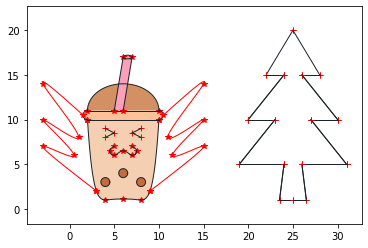

In [33]:
##### SHOW BUBBLE TEA POINTS

## Show bubble tea with mouse draw by 2 parabols
#showBubbleTea(pointU,pointLineBordCup,pointLineStraw,pointEyeL,pointEyeR,pointMouth1,pointHandRight)

## Show bubble tea with spline
showBubbleTea(pointU,pointLineBordCup,pointLineStraw,pointEyeL,pointEyeR,pointMouth2,pointHandRight,"-r")

## Show sapin next to bubble tea
showSapin(pointSapinLeft)


## Affiche la thé à bulles et le Sapin sans points

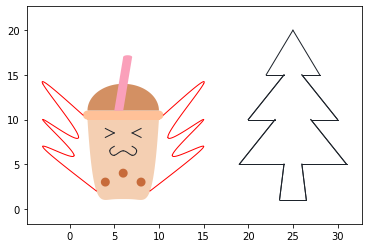

In [32]:
##### SHOW BUBBLE TEA WITH NO POINTS
showBubbleTea(pointU,pointLineBordCup,pointLineStraw,pointEyeL,pointEyeR,pointMouth2,pointHandRight,'-r',False,False)

## Show sapin next to bubble tea
showSapin(pointSapinLeft, False)